# Exercício 8
_Victor Emanuel Perticarrari Osório_

## A) Modelagem de tópicos

In [1]:
import pandas as pd
import nltk
import re
import string

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victoros\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victoros\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
trumpTweets = pd.read_csv("tweets_trump.csv")
trumpTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f


In [3]:
ps = PorterStemmer()

STOPWORDS = set(stopwords.words('english'))
PUNCTUATION = string.punctuation + '“”’'
COMMON_WORDS = ['realdonaldtrump', 'rt']

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCTUATION))

def remove_link(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def normalize_text(text):
    return [ps.stem(word) for word in word_tokenize(text)]

def remove_common_words(words):
    return list(filter(lambda word: word not in COMMON_WORDS, words))

trumpTweets['normalized_text'] = trumpTweets['text'].apply(lambda text: remove_common_words(normalize_text(remove_stopwords(remove_punctuation(remove_link(text.lower()))))))
trumpTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,normalized_text
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,"[republican, democrat, creat, econom, problem]"
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,"[thrill, back, great, citi, charlott, north, c..."
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,"[cbsherridg, read, letter, surveil, court, obt..."
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,"[unsolicit, mail, ballot, scam, major, threat,..."
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,"[mzhemingway, friendli, tell, event, comey, ap..."
...,...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,"[randpaul, dont, know, joebiden, think, contin..."
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,"[elisestefanik, presid, excel, commun, directl..."
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f,"[teamtrump, live, presidenti, debat, debates20..."
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,"[sign, order, support, worker, delphi, corpor,..."


In [4]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

n_topics = 5

docs = trumpTweets['normalized_text'].iloc
corpus_dict = Dictionary(docs)
corpus = [corpus_dict.doc2bow(doc) for doc in docs]
lda = LdaModel(corpus, num_topics=n_topics, random_state=23, id2word=corpus_dict)

topics = lda.show_topics(num_topics=n_topics, num_words=6, formatted=False)
topics = sorted(topics, key=lambda x: int(x[0]))
print("Num topics {}".format(len(topics)))
topics


Num topics 5


[(0,
  [('news', 0.012854596),
   ('amp', 0.0128535265),
   ('fake', 0.012200822),
   ('peopl', 0.008746301),
   ('media', 0.008705227),
   ('us', 0.008204002)]),
 (1,
  [('democrat', 0.02139022),
   ('border', 0.018384425),
   ('hous', 0.014507697),
   ('secur', 0.013402784),
   ('republican', 0.011404382),
   ('collus', 0.010980757)]),
 (2,
  [('thank', 0.04503024),
   ('trump', 0.02722343),
   ('presid', 0.02120244),
   ('great', 0.016370457),
   ('foxnew', 0.010930922),
   ('hunt', 0.010903215)]),
 (3,
  [('great', 0.016201168),
   ('year', 0.0124983415),
   ('new', 0.012241317),
   ('today', 0.009215793),
   ('trump', 0.008222726),
   ('day', 0.008169927)]),
 (4,
  [('great', 0.017052537),
   ('amp', 0.013293217),
   ('peopl', 0.009554915),
   ('presid', 0.008760992),
   ('border', 0.008403686),
   ('work', 0.008318814)])]

### Avaliação

Os tweets do ex-presidente Trump refletem os temas mais comuns da campanha dele e tem como intenção mostrar que ele está trabalhando nesses temas. Os temas podem ser vistos abaixo

1. Desmentindo "supostas fakes news"
2. Construção do muro com a fronteira mexicana e suposto conluio da Russia com outros países, 
3. Acenando para rede de TV que o apoia e falando de uma caça as bruxas
4. Acenando para o público que o apoia
5. Confirmando que está trabalhando na construição do muro

Trump usa seu tweet para manter seu eleitor engajado na sua campanha para construção do muro e tem que se denfender o tempo inteiro de "supostas fakes news". Uma das táticas de defesa deles é indicar que há um conluio internacional contra seus planos. A rede Fox News o é seu grande meio de interlocução com o público.

### Pontos de melhorias

Um possível ponto de melhoria seria a separação da base de retweets com a base de tweets. Grande parte dos tweets do ex-presidente americano são compostos de retweets de canais aliados, o que acaba gerando seu próprio nome de usuário e da Fox News como as palavras mais comuns. Separando essas duas bases, poderiamos verificar sobre o que ele especificamente fala e quais os assuntos que ele direciona a sua audiência.

## B) Análise de sentimentos

### 1. ReTweets

In [5]:
trumpTweets = pd.read_csv("tweets_trump.csv")
trumpReTweets = trumpTweets[trumpTweets['isRetweet'] == 't']
trumpReTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump ann...,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
11,1319496349092511744,RT @EricTrump: https://t.co/NcrNdOSfIV,t,f,Twitter for iPhone,0,8921,2020-10-23 04:30:19,f
12,1236502342121541632,RT @GOPChairwoman: The economic boom continues...,t,f,Twitter for iPhone,0,8681,2020-03-08 04:01:46,f
...,...,...,...,...,...,...,...,...,...
56564,1212165147902578688,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE...,t,f,Twitter for iPhone,0,8034,2020-01-01 00:14:26,f
56565,1212165019053494272,RT @heatherjones333: 'We Have Taken Appropriat...,t,f,Twitter for iPhone,0,5336,2020-01-01 00:13:56,f
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f


In [6]:
analyzer = SentimentIntensityAnalyzer()

trumpReTweets['compound'] = [analyzer.polarity_scores(text)['compound'] for text in trumpReTweets['text']]
trumpReTweets['neg'] = [analyzer.polarity_scores(text)['neg'] for text in trumpReTweets['text']]
trumpReTweets['neu'] = [analyzer.polarity_scores(text)['neu'] for text in trumpReTweets['text']]
trumpReTweets['pos'] = [analyzer.polarity_scores(text)['pos'] for text in trumpReTweets['text']]
trumpReTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,compound,neg,neu,pos
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,0.0000,0.000,1.000,0.000
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,0.5413,0.000,0.857,0.143
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump ann...,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f,0.6360,0.000,0.755,0.245
11,1319496349092511744,RT @EricTrump: https://t.co/NcrNdOSfIV,t,f,Twitter for iPhone,0,8921,2020-10-23 04:30:19,f,0.0000,0.000,1.000,0.000
12,1236502342121541632,RT @GOPChairwoman: The economic boom continues...,t,f,Twitter for iPhone,0,8681,2020-03-08 04:01:46,f,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56564,1212165147902578688,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE...,t,f,Twitter for iPhone,0,8034,2020-01-01 00:14:26,f,0.4526,0.292,0.318,0.389
56565,1212165019053494272,RT @heatherjones333: 'We Have Taken Appropriat...,t,f,Twitter for iPhone,0,5336,2020-01-01 00:13:56,f,0.7906,0.000,0.667,0.333
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f,-0.5574,0.130,0.870,0.000
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f,0.5423,0.000,0.837,0.163


array([[<AxesSubplot:title={'center':'pos'}>]], dtype=object)

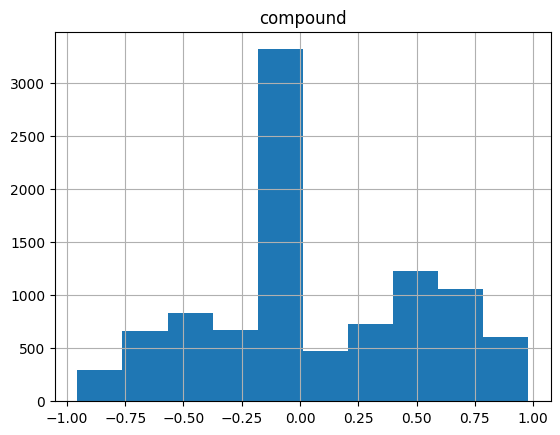

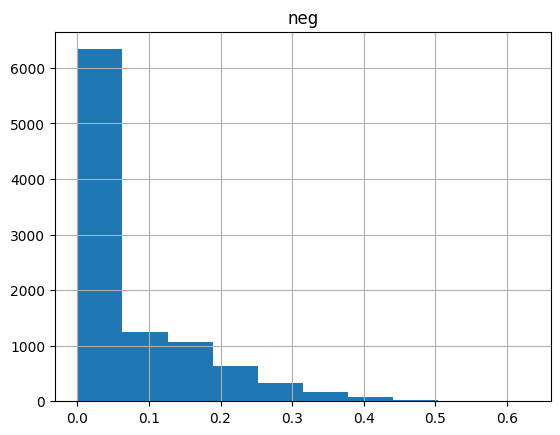

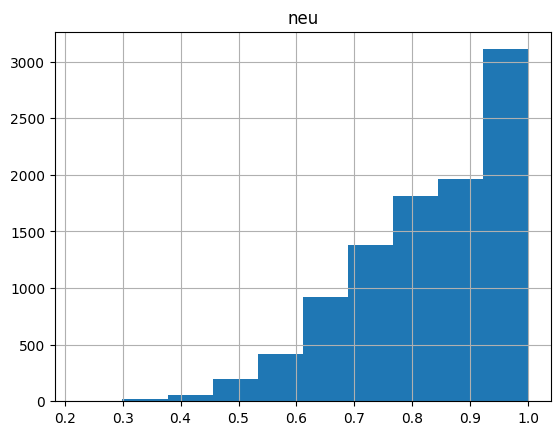

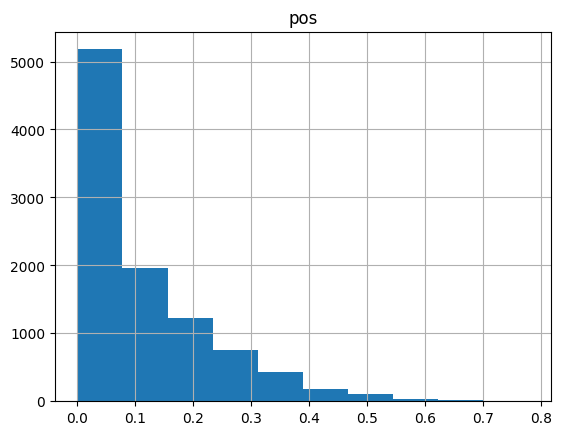

In [7]:
trumpReTweets.hist(column='compound')
trumpReTweets.hist(column='neg')
trumpReTweets.hist(column='neu')
trumpReTweets.hist(column='pos')

### 1. Tweets

In [8]:
trumpOwnTweets = trumpTweets[trumpTweets['isRetweet'] == 'f']
trumpOwnTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
6,1223640662689689602,Getting a little exercise this morning! https:...,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,https://t.co/4qwCKQOiOw,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
...,...,...,...,...,...,...,...,...,...
56555,1213078681750573056,"Iran never won a war, but never lost a negotia...",f,f,Twitter for iPhone,303007,57253,2020-01-03 12:44:30,f
56559,1212177432452698115,Thank you to the @dcexaminer Washington Examin...,f,f,Twitter for iPhone,35044,9213,2020-01-01 01:03:15,f
56560,1212175360093229056,One of my greatest honors was to have gotten C...,f,f,Twitter for iPhone,56731,12761,2020-01-01 00:55:01,f
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f


In [9]:
trumpOwnTweets['compound'] = [analyzer.polarity_scores(text)['compound'] for text in trumpOwnTweets['text']]
trumpOwnTweets['neg'] = [analyzer.polarity_scores(text)['neg'] for text in trumpOwnTweets['text']]
trumpOwnTweets['neu'] = [analyzer.polarity_scores(text)['neu'] for text in trumpOwnTweets['text']]
trumpOwnTweets['pos'] = [analyzer.polarity_scores(text)['pos'] for text in trumpOwnTweets['text']]
trumpOwnTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,compound,neg,neu,pos
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,-0.1779,0.231,0.598,0.171
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,0.9792,0.000,0.553,0.447
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,-0.9551,0.294,0.706,0.000
6,1223640662689689602,Getting a little exercise this morning! https:...,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f,0.0000,0.000,1.000,0.000
7,1319501865625784320,https://t.co/4qwCKQOiOw,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56555,1213078681750573056,"Iran never won a war, but never lost a negotia...",f,f,Twitter for iPhone,303007,57253,2020-01-03 12:44:30,f,0.4232,0.169,0.423,0.407
56559,1212177432452698115,Thank you to the @dcexaminer Washington Examin...,f,f,Twitter for iPhone,35044,9213,2020-01-01 01:03:15,f,0.5411,0.000,0.728,0.272
56560,1212175360093229056,One of my greatest honors was to have gotten C...,f,f,Twitter for iPhone,56731,12761,2020-01-01 00:55:01,f,0.9080,0.092,0.500,0.408
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f,-0.4678,0.176,0.670,0.154


array([[<AxesSubplot:title={'center':'pos'}>]], dtype=object)

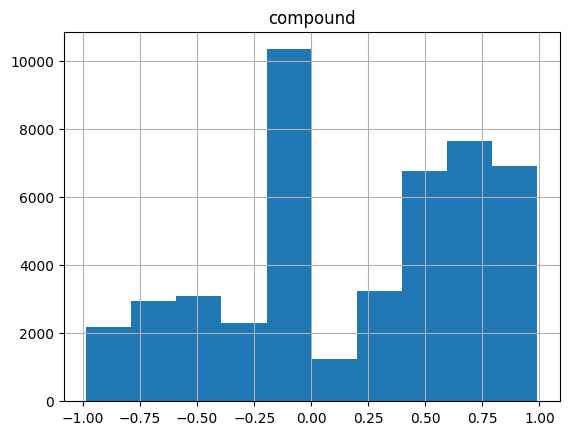

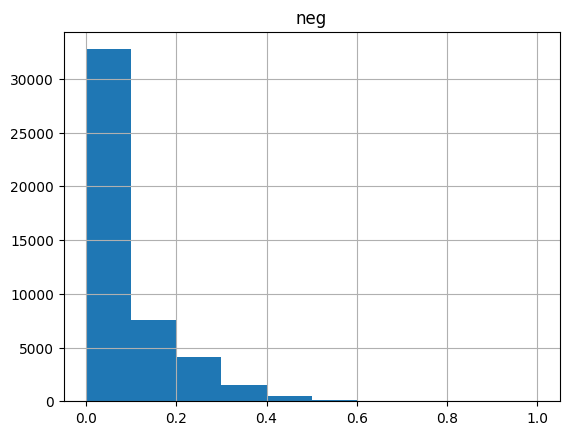

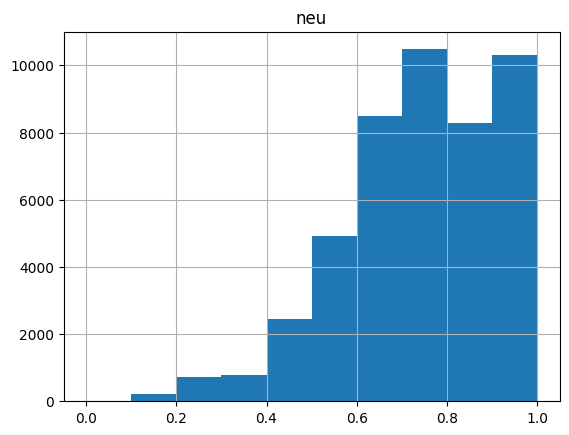

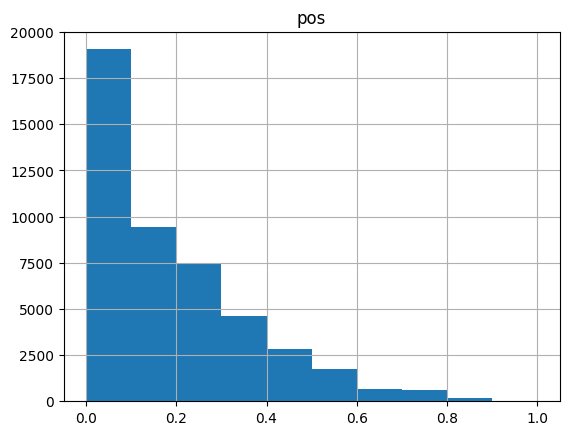

In [10]:
trumpOwnTweets.hist(column='compound')
trumpOwnTweets.hist(column='neg')
trumpOwnTweets.hist(column='neu')
trumpOwnTweets.hist(column='pos')

### Análise

Apesar do ex-presidente americano Donald Trump mover uma campanha de ódio contra parte do povo americano, seus tweets tendem a serem mais positivos, o que mostra que ele tem uma boa capacidade comunicativa mesmo lutando contra noticias negativas que ele diziam serem falsas.

Os sues próprios tweets são mais positivos que os tweets que ele impulsiona e isso foi visível na análise de tópicos ao se identificar o grande uso do adjetivo "great" e de outros adjetivos positivos com a qual ele se referia ao seus aliados.